# Fitting EfficientNet-B0 Model

In [7]:
!python -m pip install pandas numpy matplotlib seaborn tqdm 

   ---------------------------------------- 0.0/110.9 MB ? eta -:--:--
   ---------------------------------------- 1.3/110.9 MB 8.3 MB/s eta 0:00:14
   - -------------------------------------- 3.1/110.9 MB 7.8 MB/s eta 0:00:14
   - -------------------------------------- 4.5/110.9 MB 7.5 MB/s eta 0:00:15
   -- ------------------------------------- 6.0/110.9 MB 7.5 MB/s eta 0:00:14
   -- ------------------------------------- 7.6/110.9 MB 7.5 MB/s eta 0:00:14
   --- ------------------------------------ 9.2/110.9 MB 7.5 MB/s eta 0:00:14
   --- ------------------------------------ 10.7/110.9 MB 7.4 MB/s eta 0:00:14
   ---- ----------------------------------- 12.1/110.9 MB 7.3 MB/s eta 0:00:14
   ---- ----------------------------------- 13.4/110.9 MB 7.2 MB/s eta 0:00:14
   ----- ---------------------------------- 14.7/110.9 MB 7.2 MB/s eta 0:00:14
   ----- ---------------------------------- 16.3/110.9 MB 7.1 MB/s eta 0:00:14
   ------ --------------------------------- 17.6/110.9 MB 7.1 MB/s


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Nevaf\AppData\Local\Python\pythoncore-3.14-64\python.exe -m pip install --upgrade pip


The below specifies the packages we need to download

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
from PIL import Image, ImageEnhance

This chunk extracts the data from the zip file, and saves it into a "raw data" file on my laptop.

In [3]:
import zipfile

# 1. Change working directory
os.chdir("C:/Projects/DST_Project2")
print("Current directory:", os.getcwd())

# 2. Path to ZIP file
zip_path = "C:/Projects/DST_Project2/traffic_raw.zip"  # <-- full path including .zip

# 3. Extract ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("C:/Projects/DST_Project2/data/raw")  # Extract to folder
print("ZIP extracted successfully!")

Current directory: C:\Projects\DST_Project2


KeyboardInterrupt: 

I'm first going to look at the CSV files for EDA. The data is spilt into Meta: a clear graphic of the sign , and Test and Train data - all photographs.

In [21]:
data_dir = "data/raw"

#Load in the first csv files
meta_df = pd.read_csv(os.path.join(data_dir, "Meta.csv"))
test_df = pd.read_csv(os.path.join(data_dir, "Test.csv"))
train_df = pd.read_csv(os.path.join(data_dir, "Train.csv"))

# View the first few rows
print("Meta.csv:")
display(meta_df.head())

print("\nTrain.csv:")
display(train_df.head())

print("\nTest.csv:")
display(test_df.head())

#Look at number of rows, columns and data types
print("Meta.csv info:")
meta_df.info()
print("\nTrain.csv info:")
train_df.info()
print("\nTest.csv info:")
test_df.info()



Meta.csv:


,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22



Train.csv:


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png



Test.csv:


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


Meta.csv info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Path     43 non-null     object
 1   ClassId  43 non-null     int64 
 2   ShapeId  43 non-null     int64 
 3   ColorId  43 non-null     int64 
 4   SignId   42 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.8+ KB

Train.csv info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB

Test.csv info:
<class 'panda

Import the image files

In [5]:
data_dir = "data/raw/Train"


classes = sorted(os.listdir(data_dir))
print("Number of classes:", len(classes))
print(classes[:43])


Number of classes: 43
['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


Count how many images per class - compare to the data from the csv files that gracie has looked at in the report

In [6]:
image_count = {}
for c in classes:
    folder = os.path.join(data_dir, c)
    image_count[c] = len(os.listdir(folder))

image_count


{'0': 211,
 '1': 2221,
 '10': 2010,
 '11': 1320,
 '12': 2100,
 '13': 2160,
 '14': 780,
 '15': 630,
 '16': 420,
 '17': 1110,
 '18': 1200,
 '19': 210,
 '2': 2250,
 '20': 360,
 '21': 330,
 '22': 390,
 '23': 510,
 '24': 270,
 '25': 1500,
 '26': 600,
 '27': 240,
 '28': 540,
 '29': 270,
 '3': 1410,
 '30': 450,
 '31': 780,
 '32': 240,
 '33': 689,
 '34': 420,
 '35': 1200,
 '36': 390,
 '37': 210,
 '38': 2070,
 '39': 300,
 '4': 1980,
 '40': 360,
 '41': 240,
 '42': 240,
 '5': 1860,
 '6': 420,
 '7': 1440,
 '8': 1410,
 '9': 1470}

In [ ]:
plt.figure(figsize=(15,5))
plt.bar(image_count.keys(), image_count.values())
plt.title("Distribution of images per class")
plt.xlabel("Class")
plt.ylabel("Number of images")
plt.show()


above done already by gracie - EDA for Class Imbalance

now look at random images to get an idea of the data set. 

In [ ]:
image_files = [
    f for f in os.listdir(os.path.join(data_dir, "0"))
    if not f.startswith(".") 
]

sample_path = os.path.join(data_dir, "0", image_files[0])
img = Image.open(sample_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
plt.figure(figsize=(12,12))
for i in range(25):
    c = random.choice(classes)
    folder = os.path.join(data_dir, c)
    filename = random.choice(os.listdir(folder))
    
    img = Image.open(os.path.join(folder, filename))
    
    plt.subplot(5,5,i+1)
    plt.imshow(img)
    plt.title(f"Class {c}")
    plt.axis('off')

plt.show()


Now want to inspect 5 random images from each of the 43 classes

In [ ]:
random.seed(42)

for c in classes:
    folder = os.path.join(data_dir, c)
    filenames = os.listdir(folder)
    
    sample_files = random.sample(filenames, min(5, len(filenames)))
    
    # Plot images
    plt.figure(figsize=(15, 3))
    plt.suptitle(f"Class {c}", fontsize=16)
    
    for i, f in enumerate(sample_files):
        img_path = os.path.join(folder, f)
        img = Image.open(img_path)
        
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.axis("off")
    
    plt.show()

Can see irregularities in brightness, rotation, blur, angle? quality etc


i want to look at pixel distributions to see if most of the photos are dark/light etc - this will help us decide how to edit the dataset - data augmentation. first here is how we look at a plot of the pixels of one sign. pixels are 0-255 (0 =dark) --- for a batch of images a histogram tells us if the photos are dim or well-lit overall and if the data set is consistent or highly variable. 

maybe look at how pixel distributions vary accross classes


In [ ]:
img = np.array(img) 
plt.hist(img.ravel(), bins=255)
plt.title("Pixel intensity distribution")
plt.show()

following should take loads of images - 200-500 and flatten them all into one big list and then plot a histogram. 

In [ ]:
random.seed(42)
np.random.seed(42)

pixel_values = []

# take up to 10 random images from each class
for c in classes:
    folder = os.path.join(data_dir, c)
    filenames = os.listdir(folder)
    sample_files = random.sample(filenames, min(10, len(filenames)))
    
    for f in sample_files:
        img = Image.open(os.path.join(folder, f)).convert('RGB')
        img_array = np.array(img)
        pixel_values.extend(img_array.flatten())

# Plot histogram
plt.figure(figsize=(10,5))
plt.hist(pixel_values, bins=50, color='gray')
plt.title("Pixel Intensity Distribution Across Dataset")
plt.xlabel("Pixel Value (0-255)")
plt.ylabel("Frequency")
plt.show()


In [ ]:
pixels = np.array(pixel_values)

# Compute more statistics
print("Min pixel value:", np.min(pixels))
print("25th percentile:", np.percentile(pixels, 25))
print("Median (50th percentile):", np.median(pixels))
print("75th percentile:", np.percentile(pixels, 75))
print("Max pixel value:", np.max(pixels))
print("Mean pixel value:", np.mean(pixels))
print("Standard deviation:", np.std(pixels))

now we have data on the pixel distribution in a sample of images - we can do augmentation.
to be hoenst there are so many images in each categrory i don't even know if this is necessary.

In [ ]:
random.seed(42)
np.random.seed(42)

def augment_image(img):
    # Rotation ±10°
    angle = random.uniform(-10, 10)
    img = img.rotate(angle)

    # Random horizontal and vertical shift (10% max)
    max_shift_x = int(0.1 * img.width)
    max_shift_y = int(0.1 * img.height)
    shift_x = random.randint(-max_shift_x, max_shift_x)
    shift_y = random.randint(-max_shift_y, max_shift_y)
    img = img.transform(img.size, Image.AFFINE, (1, 0, shift_x, 0, 1, shift_y))

    # Random zoom/crop ±10%
    zoom_factor = random.uniform(0.9, 1.1)
    w, h = img.size
    new_w, new_h = int(w * zoom_factor), int(h * zoom_factor)
    img = img.resize((new_w, new_h), Image.BILINEAR)
    img = img.crop((0, 0, w, h))  # crop or pad back to original size

    # Brightness adjustment ±20%
    enhancer = ImageEnhance.Brightness(img)
    factor = random.uniform(0.8, 1.2)
    img = enhancer.enhance(factor)

    return img

class_folder = os.path.join(data_dir, "0")
image_files = [f for f in os.listdir(class_folder) 
               if f.lower().endswith(('.png', '.jpg', '.jpeg', '.ppm'))]

sample_path = os.path.join(class_folder, image_files[0])
img1 = Image.open(sample_path)

aug_img1 = augment_image(img1)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(aug_img1)
plt.title("Augmented")
plt.axis("off")
plt.show()

Now we've finished EDA and we can move on to fitting the model.






STEP 1: INSTALL DEPENDENCIES

In [8]:
pip install tensordict

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Nevaf\AppData\Local\Python\pythoncore-3.14-64\python.exe -m pip install --upgrade pip


In [3]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu


Looking in indexes: https://download.pytorch.org/whl/cpu
Note: you may need to restart the kernel to use updated packages.


In [11]:
import os
import copy 
import multiprocessing
import numpy as np
from tensordict.nn import TensorDictSequential
from PIL import Image
from collections import defaultdict

import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
from torch.optim import Adam
from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm import tqdm #installs a progress bar for epochs 


Set up the environment, and ensure the code runs on a GPU if it's available. Set the hyperparameters for the rest of the code. EfficientNet works only with specific image size etc.

In [19]:
is_fork = multiprocessing.get_start_method() == "fork"
device = (
    torch.device(0)
    if torch.cuda.is_available() and not is_fork
    else torch.device("cpu")
)

IMG_SIZE = 224 # necessary for EfficientNet
BATCH_SIZE = 32
SEED = 42
NUM_CLASSES = 43
EPOCHS = 10

torch.manual_seed(SEED)

Prepare the dataset afetr EDA. We select 50% of the images per class to fit a model to and we create a custom dataset class.

In [75]:

data_dir = "data/raw/Train"

classes = sorted(os.listdir(data_dir))
print("Number of classes:", len(classes))

image_count = {}
half_dataset = []  # final list of selected images

for c in classes:
    folder = os.path.join(data_dir, c)
    files = os.listdir(folder)
    image_count[c] = len(files)
    half = len(files) // 2
    selected = np.random.choice(files, half, replace=False)
    half_dataset.extend([os.path.join(folder, f) for f in selected])

print("Original total images:", sum(image_count.values()))
print("Reduced total images:", len(half_dataset))


Number of classes: 43
Original total images: 39211
Reduced total images: 19604


In [84]:
class FilepathDataset(Dataset):
    def __init__(self, filepaths, transform=None):
        self.filepaths = filepaths
        self.transform = transform

    def __len__(self):
        return len(self.filepaths)

    def __getitem__(self, idx):
        path = self.filepaths[idx]
        img = Image.open(path).convert("RGB")
        label = int(os.path.basename(os.path.dirname(path)))
        
        if self.transform:
            img = self.transform(img)
            
        else:
            from torchvision import transforms
            img = transforms.ToTensor()(img)

        return img, label


Now we apply transformations/ perform data augmentation. This dataset is already quite varied but

In [85]:
train_transforms = transforms.Compose([
    transforms.RandomRotation(5),
    transforms.RandomAffine(0, translate=(0.1, 0.1)),
    transforms.ColorJitter(contrast=0.1),
    transforms.ToTensor(),
    transforms.Resize((IMG_SIZE, IMG_SIZE))
    EfficientNet_B0_Weights.IMAGENET1K_V1.transforms()
])

val_transforms = transforms.Compose([ 
    transforms.ToTensor(),
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    EfficientNet_B0_Weights.IMAGENET1K_V1.transforms()
]) 

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2746896537.py, line 6)

In [87]:
full_ds = FilepathDataset(half_dataset)

train_size = int(0.8 * len(half_dataset))
val_size = len(full_ds) - train_size

train_ds, val_ds = torch.utils.data.random_split(
    full_ds,
    [train_size, val_size],
    generator=torch.Generator().manual_seed(SEED)
)
train_ds.dataset.transform = train_transforms
val_ds.dataset.transform = val_transforms

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False)


Now we start setting up the model.
# Remove classifier → keep global average pooling
# Freeze base model
# Your custom classifier head


In [89]:
weights = EfficientNet_B0_Weights.IMAGENET1K_V1
base_model = efficientnet_b0(weights=weights)
base_model.classifier = nn.Identity()

for param in base_model.parameters():
    param.requires_grad = False

model = nn.Sequential(
    base_model,
    nn.Linear(1280, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, NUM_CLASSES),
    nn.Softmax(dim=1)
)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=1e-3)
scheduler = ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)


Start the training loop

In [91]:
best_val_loss = float("inf")
patience = 5
wait = 0
best_model_state = None


Now we run the baseline model, with frozen blocks:

In [93]:
for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch+1}/{EPOCHS}")

    model.train() #TRAIN
    running_loss = 0.0
    running_corrects = 0

    for images, labels in tqdm(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
        running_corrects += (outputs.argmax(1) == labels).sum().item()

    train_loss = running_loss / len(train_loader.dataset)
    train_acc = running_corrects / len(train_loader.dataset)

    
    model.eval() #VALIDATE
    val_running_loss = 0.0
    val_running_corrects = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item() * images.size(0)
            val_running_corrects += (outputs.argmax(1) == labels).sum().item()

    val_loss = val_running_loss / len(val_loader.dataset)
    val_acc = val_running_corrects / len(val_loader.dataset)

    # scheduler takes average val_loss
    scheduler.step(val_loss)

    print(f"Train Loss: {train_loss:.4f} Acc: {train_acc:.4f}")
    print(f"Val   Loss: {val_loss:.4f} Acc: {val_acc:.4f}")

    if val_loss < best_val_loss: #Early stopping
        best_val_loss = val_loss
        best_model_state = copy.deepcopy(model.state_dict())
        torch.save(best_model_state, "efficientnet_best.pth")
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print("Early stopping triggered.")
            break



Epoch 1/10


100%|████████████████████████| 491/491 [15:20<00:00,  1.88s/it]


Train Loss: 3.3156 Acc: 0.4917
Val   Loss: 3.2636 Acc: 0.5440

Epoch 2/10


100%|████████████████████████| 491/491 [16:04<00:00,  1.96s/it]


Train Loss: 3.2898 Acc: 0.5169
Val   Loss: 3.2581 Acc: 0.5471

Epoch 3/10


100%|████████████████████████| 491/491 [15:21<00:00,  1.88s/it]


Train Loss: 3.2761 Acc: 0.5292
Val   Loss: 3.2519 Acc: 0.5511

Epoch 4/10


100%|████████████████████████| 491/491 [13:09<00:00,  1.61s/it]


Train Loss: 3.2665 Acc: 0.5397
Val   Loss: 3.2441 Acc: 0.5593

Epoch 5/10


100%|████████████████████████| 491/491 [14:27<00:00,  1.77s/it]


Train Loss: 3.2529 Acc: 0.5523
Val   Loss: 3.2284 Acc: 0.5733

Epoch 6/10


100%|████████████████████████| 491/491 [14:54<00:00,  1.82s/it]


Train Loss: 3.2371 Acc: 0.5676
Val   Loss: 3.2035 Acc: 0.6001

Epoch 7/10


100%|████████████████████████| 491/491 [16:35<00:00,  2.03s/it]


Train Loss: 3.2222 Acc: 0.5814
Val   Loss: 3.1957 Acc: 0.6067

Epoch 8/10


100%|████████████████████████| 491/491 [15:30<00:00,  1.90s/it]


Train Loss: 3.2149 Acc: 0.5892
Val   Loss: 3.1978 Acc: 0.6047

Epoch 9/10


100%|████████████████████████| 491/491 [13:52<00:00,  1.70s/it]


Train Loss: 3.2105 Acc: 0.5942
Val   Loss: 3.1814 Acc: 0.6251

Epoch 10/10


100%|████████████████████████| 491/491 [12:39<00:00,  1.55s/it]


Train Loss: 3.1865 Acc: 0.6190
Val   Loss: 3.1534 Acc: 0.6501


Save the best/final model

In [ ]:
torch.save(model.state_dict(), "efficientnet_finetuned.pth")

We've got values for the loss and accuracy for training and validation - got to 65% accuracy on validation by the last epoch. Now time for fine tuning.

features.0.0.weight
features.0.1.weight
features.0.1.bias
features.1.0.block.0.0.weight
features.1.0.block.0.1.weight
features.1.0.block.0.1.bias
features.1.0.block.1.fc1.weight
features.1.0.block.1.fc1.bias
features.1.0.block.1.fc2.weight
features.1.0.block.1.fc2.bias
features.1.0.block.2.0.weight
features.1.0.block.2.1.weight
features.1.0.block.2.1.bias
features.2.0.block.0.0.weight
features.2.0.block.0.1.weight
features.2.0.block.0.1.bias
features.2.0.block.1.0.weight
features.2.0.block.1.1.weight
features.2.0.block.1.1.bias
features.2.0.block.2.fc1.weight
features.2.0.block.2.fc1.bias
features.2.0.block.2.fc2.weight
features.2.0.block.2.fc2.bias
features.2.0.block.3.0.weight
features.2.0.block.3.1.weight
features.2.0.block.3.1.bias
features.2.1.block.0.0.weight
features.2.1.block.0.1.weight
features.2.1.block.0.1.bias
features.2.1.block.1.0.weight
features.2.1.block.1.1.weight
features.2.1.block.1.1.bias
features.2.1.block.2.fc1.weight
features.2.1.block.2.fc1.bias
features.2.1.blo

In [95]:
# Unfreeze the last two MBConv stages: features.6 and features.7
for name, param in base_model.named_parameters():
    if name.startswith("features.6") or name.startswith("features.7"):
        param.requires_grad = True


#classifier = layers 1 and 4 of the Sequential
#backbone fine-tuned layers = features.6 and features.7
different learing rate for classifier and backbone
       # fast learning for classifier

    # slow learning for fine-tuned blocks


In [97]:
classifier_params = list(model[1].parameters()) + list(model[4].parameters())

backbone_params = [
    p for name, p in base_model.named_parameters()
    if name.startswith("features.6") or name.startswith("features.7")
]

optimizer = torch.optim.Adam([
    {"params": classifier_params, "lr": 1e-3},     
    {"params": backbone_params, "lr": 1e-4}        
])


Fine tuning loop 

In [99]:
EPOCHS = 5
for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch+1}/{EPOCHS}")

    # ---- Train ----
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for images, labels in tqdm(train_loader):
        optimizer.zero_grad()
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()

        # FIX: multiply by batch size
        running_loss += loss.item() * images.size(0)
        running_corrects += (outputs.argmax(1) == labels).sum().item()

    # FIX: divide by dataset size (not by batches)
    train_loss = running_loss / len(train_loader.dataset)
    train_acc = running_corrects / len(train_loader.dataset)

    # ---- Validation ----
    model.eval()
    val_running_loss = 0.0
    val_running_corrects = 0

    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)

            # FIX: multiply by batch size
            val_running_loss += loss.item() * images.size(0)
            val_running_corrects += (outputs.argmax(1) == labels).sum().item()

    # FIX: divide by dataset size
    val_loss = val_running_loss / len(val_loader.dataset)
    val_acc = val_running_corrects / len(val_loader.dataset)

    # scheduler takes average val_loss
    scheduler.step(val_loss)

    print(f"Train Loss: {train_loss:.4f} Acc: {train_acc:.4f}")
    print(f"Val   Loss: {val_loss:.4f} Acc: {val_acc:.4f}")

    # ---- Early stopping ----
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model_state = copy.deepcopy(model.state_dict())
        torch.save(best_model_state, "efficientnet_best.pth")
        wait = 0
    else:
        wait += 1
        if wait >= patience:
            print("Early stopping triggered.")
            break



Epoch 1/5


100%|████████████████████████| 491/491 [17:44<00:00,  2.17s/it]


Train Loss: 3.1255 Acc: 0.6766
Val   Loss: 3.0977 Acc: 0.7031

Epoch 2/5


100%|████████████████████████| 491/491 [19:53<00:00,  2.43s/it]


Train Loss: 3.0977 Acc: 0.7041
Val   Loss: 3.0821 Acc: 0.7195

Epoch 3/5


100%|████████████████████████| 491/491 [19:08<00:00,  2.34s/it]


Train Loss: 3.0825 Acc: 0.7190
Val   Loss: 3.0709 Acc: 0.7302

Epoch 4/5


100%|████████████████████████| 491/491 [18:54<00:00,  2.31s/it]


Train Loss: 3.0588 Acc: 0.7424
Val   Loss: 3.0400 Acc: 0.7615

Epoch 5/5


100%|████████████████████████| 491/491 [19:22<00:00,  2.37s/it]


Train Loss: 3.0453 Acc: 0.7556
Val   Loss: 3.0357 Acc: 0.7654


In [100]:
torch.save(model.state_dict(), "efficientnet_finetuned.pth")


In [13]:
train_losses = [3.1255, 3.0977, 3.0825, 3.0588, 3.0453]
val_losses   = [3.0977, 3.0821, 3.0709, 3.0400, 3.0357]
train_accs   = [0.6766, 0.7041, 0.7190, 0.7424, 0.7556]
val_accs     = [0.7031, 0.7195, 0.7302, 0.7615, 0.7654]

SyntaxError: invalid syntax (1372664530.py, line 1)

In [15]:
epochs = [1,2,3,4,5]

plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Train Loss", marker='o')
plt.plot(val_losses, label="Val Loss", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,5))
plt.plot(train_accs, label="Train Accuracy", marker='o')
plt.plot(val_accs, label="Val Accuracy", marker='o')
plt.xlim(1, 5)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xticks(epochs)
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'plt' is not defined

want to shift these along so they start at epoch 1 rather than 0

In [113]:
!python -m pip install scikit-learn
from sklearn.metrics import classification_report

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        outputs = model(images)
        preds = outputs.argmax(1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print(classification_report(all_labels, all_preds))



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Nevaf\AppData\Local\Python\pythoncore-3.14-64\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/8.8 MB ? eta -:--:--
   ---------------- ----------------------- 3.7/8.8 MB 19.6 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.8 MB 23.4 MB/s eta 0:00:01
   ---------------------------------------- 8.8/8.8 MB 21.5 MB/s  0:00:00
   ---------------------------------------- 0.0/39.4 MB ? eta -:--:--
   ------ --------------------------------- 6.8/39.4 MB 34.5 MB/s eta 0:00:01
   -------------- ------------------------- 13.9/39.4 MB 34.0 MB/s eta 0:00:01
   -------------------- ------------------- 20.4/39.4 MB 33.7 MB/s eta 0:00:01
   -------------------------- ------------- 25.7/39.4 MB 31.3 MB/s eta 0:00:01
   ------------------------------ --------- 30.4/39.4 MB 29.6 MB/s eta 0:00:01
   ----------------------------------- ---- 35.1/39.4 MB 28.5 MB/s eta 0:00:01
   ---------------------------------------  38.5/39.4 MB 26.9 MB/s eta 0:00:01
   ---------------------------------------- 39.4/39.4 MB 25.6 MB/s  0:00:01

   -

C:\Users\Nevaf\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Nevaf\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Nevaf\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [116]:
from sklearn.metrics import classification_report

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        outputs = model(images)
        preds = outputs.argmax(1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print(classification_report(
    all_labels, 
    all_preds,
    zero_division = 0))



              precision    recall  f1-score   support

           0       0.00      0.00      0.00        18
           1       0.91      0.94      0.93       220
           2       0.91      0.93      0.92       215
           3       0.94      0.93      0.93       127
           4       0.91      0.99      0.95       194
           5       0.86      0.95      0.90       190
           6       0.66      1.00      0.79        46
           7       0.98      0.98      0.98       133
           8       0.93      0.94      0.93       139
           9       0.85      0.99      0.92       148
          10       0.80      1.00      0.89       197
          11       0.00      0.00      0.00       120
          12       0.95      1.00      0.97       242
          13       0.95      1.00      0.98       207
          14       0.96      0.99      0.98        80
          15       0.99      1.00      0.99        69
          16       0.00      0.00      0.00        43
          17       0.96    

above gives classification report: precision, recall, f1 per class. now we do confusion matrix heat map

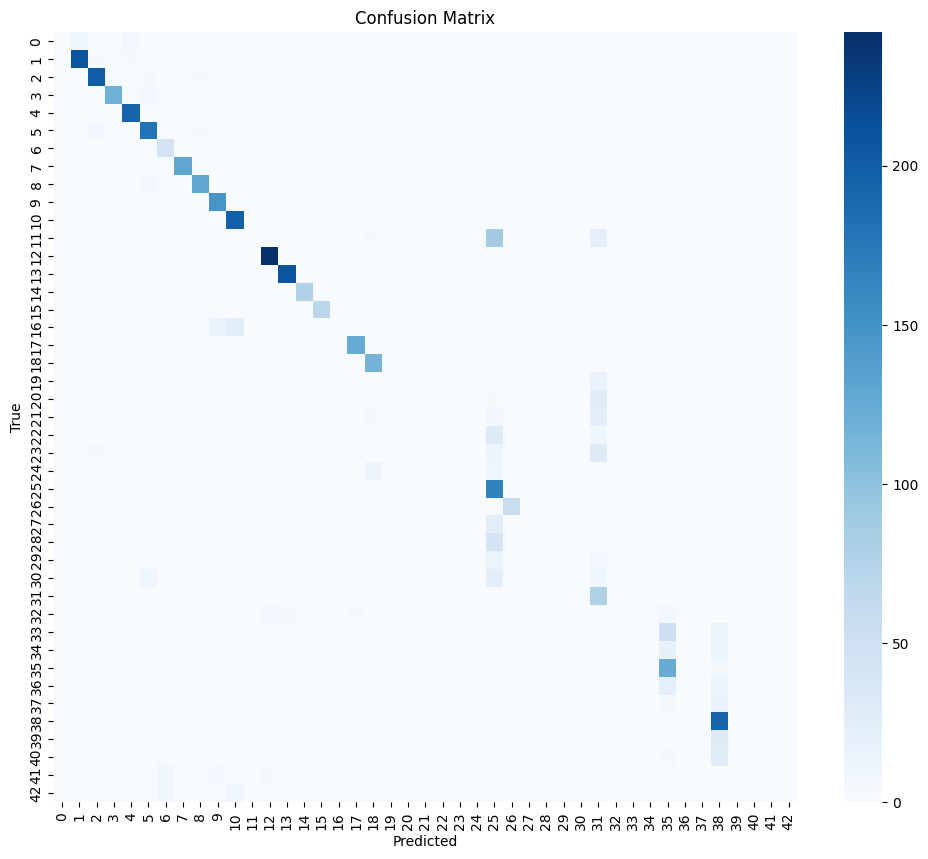

In [118]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


now time for few shot learning. shows how accuracy drops under small data conditions

In [3]:
import os
os.getcwd()


'C:\\Users\\Nevaf'